In [19]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_wine = pd.read_csv('Wine.csv', header = None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [5]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
pca = PCA(n_components=3)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [16]:
from mpl_toolkits.mplot3d import Axes3D

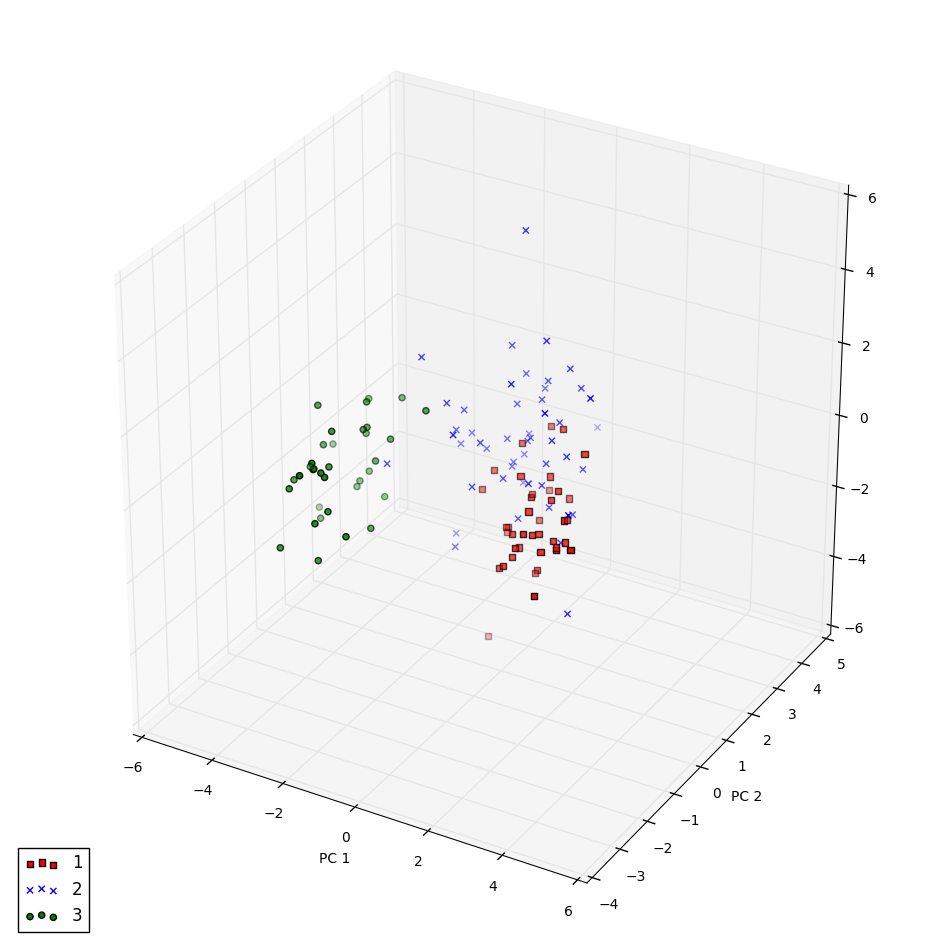

In [22]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111, projection='3d')
for l,c,m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l, 1],X_train_pca[y_train==l, 2], c=c, label=l, marker=m,zdir = 'z' )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()